In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from frameworks_from_scratch import *
import frameworks_from_scratch.function as f
import os
import matplotlib.pyplot as plt

In [2]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = f.transpose(x)
y.backward()
x.grad

Variable([[1 1 1]
          [1 1 1]])

In [5]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.transpose(x)
y

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
x = Variable(np.random.randn(1, 2, 3))
y = x.reshape((2, 3))
x = y.reshape(2, 3)
print(x)
y


Variable([[-1.57063232  0.88472598 -0.84821509]
          [ 0.07097114  0.51055568  0.57147547]])


Variable([[-1.57063232  0.88472598 -0.84821509]
          [ 0.07097114  0.51055568  0.57147547]])

In [2]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = f.reshape(x, (6, ))
y.backward(retrain_grad=True)
x.grad

Variable([[1 1 1]
          [1 1 1]])

In [3]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
t = x + c
y = f.sum(t)

AttributeError: module 'frameworks_from_scratch.function' has no attribute 'sum'

In [4]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.reshape(x, (6, ))
y

array([1, 2, 3, 4, 5, 6])

In [12]:
x = Variable(2.)
y = x ** 2
y.backward(create_graph=True)
gx = x.grad
x.cleargrad()

z = gx ** 3 + y
z.backward()
print(x.grad)

Variable(100.0)


In [11]:
x = Variable(1.)
y = f.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

num_iter = 0
for i in range(num_iter):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(num_iter+1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')

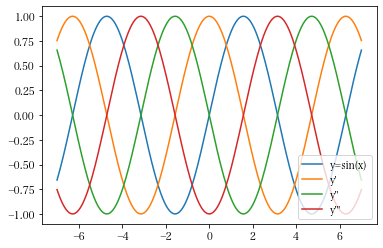

In [10]:
x = Variable(np.linspace(-7, 7, 200))
y = f.sin(x)
y.backward(create_graph=True)

logs = [y.data.flatten()]
for i in range(3):
    logs.append(x.grad.data.flatten())
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    
labels = ['y=sin(x)', "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])

plt.legend(loc='lower right')
plt.show()

In [5]:
x = Variable(1.)
y = f.sin(x)
y.backward(create_graph=True)

for i in range(3):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    print(x.grad)

Variable(-0.8414709848078965)
Variable(-0.5403023058681398)
Variable(0.8414709848078965)


In [4]:
def f(x):
    return x ** 4 - 2*x**2

x = Variable(2.)
num_iter = 10
for i in range(num_iter):
    print(i, x)
    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True)
    
    gx = x.grad
    x.cleargrad()
    gx.backward()
    gx2 = x.grad
    
    x.data -= gx.data / gx2.data


0 Variable(2.0)
1 Variable(1.4545454545454546)
2 Variable(1.1510467893775467)
3 Variable(1.0253259289766978)
4 Variable(1.0009084519430513)
5 Variable(1.0000012353089454)
6 Variable(1.000000000002289)
7 Variable(1.0)
8 Variable(1.0)
9 Variable(1.0)


In [3]:
def f(x):
    return x ** 4 - 2*x**2

x = Variable(2.)
y = f(x)
y.backward(create_graph = True)
print(x.grad)

gx = x.grad
x.cleargrad()
gx.backward()
print(x.grad)
print(gx.grad)

Variable(24.0)
Variable(44.0)
None


In [5]:
def f(x):
    return x ** 4 - 2*x**2

def gx2(x):
    return 12 *x **2 - 4

x = Variable(2.)
num_iter = 10
for i in range(num_iter):
    print(i, x)
    y = f(x)
    x.cleargrad()
    y.backward()
    x.data -= x.grad / gx2(x.data)

0 Variable(2.0)
1 Variable(1.4545454545454546)
2 Variable(1.1510467893775467)
3 Variable(1.0253259289766978)
4 Variable(1.0009084519430513)
5 Variable(1.0000012353089454)
6 Variable(1.000000000002289)
7 Variable(1.0)
8 Variable(1.0)
9 Variable(1.0)


In [4]:
x0 = Variable(0.)
x1 = Variable(2.)
y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

lr = 1e-3
num_iter = int(1e4)

for i in range(num_iter):
    y = rosenbrock(x0, x1)
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

-2.0 400.0


In [ ]:
x0.data
x1.data


In [4]:
x = Variable(np.pi / 4)
y = taylor_sin(x)
y.backward()
print(y.data)
print(x.grad)

plot_dot_graph(y, verbose=False, to_file='sin.png')

0.7071064695751781
0.7071032148228457


In [2]:
x = Variable(1.)
y = Variable(1.)
z = goldstein(x, y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'

plot_dot_graph(z, verbose=False, to_file='goldstein.png')

In [2]:
x0 = Variable(1.)
x1 = Variable(1.)
y = x0 + x1
txt = f_to_dot(y.creator)
print(txt)

4565716416 [label="Add", color=lightblue, style=filled, shape=box]
4565716320 -> 4565716416
4565716176 -> 4565716416
4565716416 -> 4565716512



In [2]:
x = Variable(np.random.randn(2, 3))
x.name = 'x'
print(dot_var_str(x))
print(dot_var_str(x, verbose=True))

4671452208 [label="x"], color=orange, style=filled]

4671452208 [label="x: (2, 3) float64"], color=orange, style=filled]



In [ ]:
x0 = Variable(1.)
x1 = Variable(1.)
y = x0 + x1

x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

txt = get_dot_graph(y, verbose=False)
print(txt)
with open(f'../dot/input/{os.environ.get("DOT_FILE")}.dot') as o:
    o.write(txt)

In [4]:
def sphere(x, y):
    z = x **2 + y **2
    return z

x = Variable(1.)
y = Variable(1.)
z = sphere(x, y)
z.backward()
x.grad, y.grad


(2.0, 2.0)

In [3]:
x = Variable([2.0])
x**3


Variable([8.])

In [2]:
x = Variable([1.0])
y = -x
y

Variable([-1.])

In [2]:
x = Variable([1.0])
y = np.array([2.]) + x
y


Variable([3.])

In [5]:
x = Variable([1.0])
y = np.array([2.]) + x
y

array([Variable([3.])], dtype=object)

In [2]:
x = Variable(2.)
y = 3. * x + 1.
print(y)

Variable(7.0)


In [2]:
x = Variable(2.)
y = x + np.array(3.)
print(y)

Variable(5.0)


In [2]:
a = Variable(3.0)
b = Variable(2.)
y = a * b
print(y)


Variable(6.0)


In [3]:
a = Variable(3.0)
b = Variable(2.)
c = Variable(1.)

# y = add(mul(a, b), c)
y = a * b + c
y.backward()

print(y)
print(a.grad)
print(b.grad)

Variable(7.0)
2.0
3.0


In [5]:
x = Variable(np.array([[3, 2], [2, 1]]))
x

Variable([[3 2]
          [2 1]])

In [2]:
with no_grad(): 
    x = Variable(np.array(2.0))
    y = square(x)

In [13]:
x = Variable(np.array(2.0))
a = square(x)
y = add(square(a), square(a))
y.backward()

print(y.data)
print(x.grad)

32.0
64.0


In [12]:
generations = [2, 0, 1, 4, 2]
funcs = []

for g in generations:
    f = Function()
    f.generation = g
    funcs.append(f)

[f.generation for f in funcs]

[2, 0, 1, 4, 2]

In [7]:
x = Variable(np.array(3.))
y = add(add(x, x), x)
print('y', y.data)

y.backward()
print('x.grad', x.grad)
# y = add(x0, x1)

y 9.0
x.grad 3.0


Variable(13.00)

In [5]:
y.data

array(5)

In [4]:
np.isscalar(3)


In [3]:
A = Square()
B = Exp()
C = Square()

x = Variable(np.array(0.5))
a = A(x)
b = B(a)
y = C(b)


In [4]:
assert y.creator == C
assert y.creator.input == b
assert y.creator.input.creator == B
assert y.creator.input.creator.input == a
assert y.creator.input.creator.input.creator == A


y.grad = np.array(1.0)
C = y.creator
b = C.input
b.grad = C.backward(y.grad)

In [5]:
y.grad = np.array(1.0)
y.backward()

In [6]:
x.grad

3.297442541400256